Total de predicciones correctas: 394
Precisión del modelo: 0.98


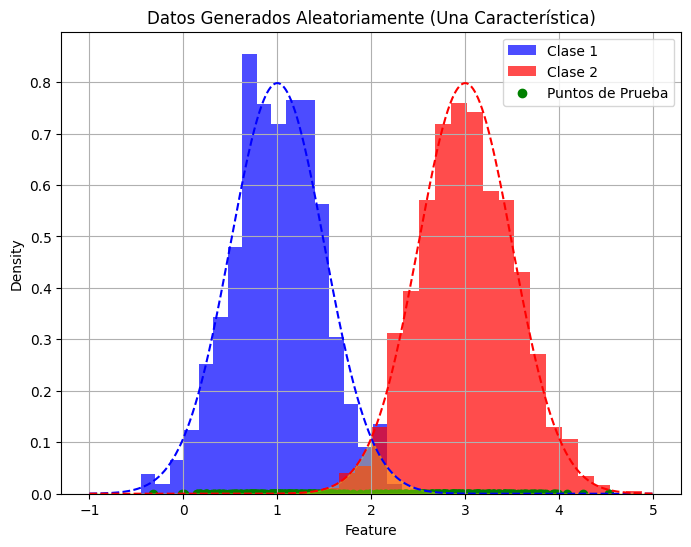

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Función para calcular la probabilidad de clase (phi)
def calculate_phi(class_samples):
    return len(class_samples) / total_samples

# Función para calcular la media (mu) de una clase
def calculate_mu(class_samples):
    return np.mean(class_samples)

# Función para calcular la matriz de covarianza (sigma) de una clase
def calculate_sigma(class_samples):
    return np.cov(class_samples, rowvar=False)

# Función de densidad de probabilidad gaussiana unidimensional
def gaussian_pdf(x, mu, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Función para predecir la clase de un punto de prueba
def predict_class(x_test, phi1, mu1, sigma1, phi2, mu2, sigma2):
    # Calcular la probabilidad de pertenencia a cada clase
    prob_class1 = phi1 * gaussian_pdf(x_test, mu1, sigma1)
    prob_class2 = phi2 * gaussian_pdf(x_test, mu2, sigma2)
    
    # Devolver la clase con la probabilidad más alta
    return 1 if prob_class1 > prob_class2 else 2

# Generar datos aleatorios para una característica y dos clases
np.random.seed(28903)

# Clase 1
mean1 = 1
std_dev1 = 0.5
class1_samples = np.random.normal(mean1, std_dev1, 1000)  # Aumentar el tamaño de la muestra

# Clase 2
mean2 = 3
std_dev2 = 0.5
class2_samples = np.random.normal(mean2, std_dev2, 1000)  # Aumentar el tamaño de la muestra

# Generar datos de entrenamiento y de prueba
train_samples = np.concatenate([class1_samples[:800], class2_samples[:800]])
test_samples = np.concatenate([class1_samples[800:], class2_samples[800:]])

# Visualización de los datos generados
plt.figure(figsize=(8, 6))
plt.hist(class1_samples, bins=20, color='blue', alpha=0.7, label='Clase 1', density=True)
plt.hist(class2_samples, bins=20, color='red', alpha=0.7, label='Clase 2', density=True)
plt.scatter(test_samples, np.zeros_like(test_samples), color='green', marker='o', label='Puntos de Prueba')
plt.xlabel('Feature')
plt.ylabel('Density')
plt.title('Datos Generados Aleatoriamente (Una Característica)')
plt.legend()
plt.grid(True)

# Crear un rango de valores para la línea de densidad de probabilidad
x = np.linspace(-1, 5, 1000)

# Calcular las densidades de probabilidad para cada clase
pdf1 = norm.pdf(x, mean1, std_dev1)
pdf2 = norm.pdf(x, mean2, std_dev2)

# Graficar las líneas de densidad de probabilidad
plt.plot(x, pdf1, color='blue', linestyle='--')
plt.plot(x, pdf2, color='red', linestyle='--')

# Superponer el área donde se superponen las campanas de Gauss
min_pdf = np.minimum(pdf1, pdf2)
plt.fill_between(x, min_pdf, color='yellow', alpha=0.3)

# Calcular phi, mu y sigma para cada clase
total_samples = len(class1_samples) + len(class2_samples)

phi1 = calculate_phi(class1_samples)
mu1 = calculate_mu(class1_samples)
sigma1 = calculate_sigma(class1_samples)

phi2 = calculate_phi(class2_samples)
mu2 = calculate_mu(class2_samples)
sigma2 = calculate_sigma(class2_samples)

# Realizar predicciones para los datos de prueba
predictions = [predict_class(x, phi1, mu1, sigma1, phi2, mu2, sigma2) for x in test_samples]

# Imprimir las predicciones y calcular la precisión
correct_predictions = sum(1 for i, pred in enumerate(predictions) if (i < 200 and pred == 1) or (i >= 200 and pred == 2))
accuracy = correct_predictions / len(test_samples)

print(f"Total de predicciones correctas: {correct_predictions}")
print(f"Precisión del modelo: {accuracy:.2f}")

plt.show()
